### Korean Security Market

#### 1. Data Import

**1.1 KOSPI 상장기업 불러오기**

Notion Database에 있는 `stock_list.csv`는 한국 KOSPI, KOSDAQ, KONEX에 상장되어 있는 모든 기업의 종목 정보를 저장한 파일이다. Code에서 0으로 끝나는 종목만이 거래가 원활하기 때문에 필터링 과정이 필요하다

종목코드가 0으로 끝나는 ticker만을 필터링하여 상위 200개의 종목의 티커를 list형태로 저장하라

In [25]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

stock_list = pd.read_csv('stock_list.csv', index_col = 0)
stock_list

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,NaN,71300,2,-400,-0.56,71100,71400,70800,6988218,497101486200,425645495815000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,NaN,557000,2,-3000,-0.54,560000,563000,551000,251421,140379001000,130338000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,NaN,116700,2,-800,-0.68,116500,117300,115200,1352313,157092787800,84957875995500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,NaN,734000,2,-7000,-0.94,739000,743000,730000,24105,17787925000,52241716000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,NaN,59600,2,-200,-0.33,59800,59900,59300,628228,37411700800,49044047320000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,288490,KR7288490006,나라소프트,KONEX,일반기업부,70,1,7,11.11,57,72,57,450742,30987351,2670290000,38147000,KNX
2727,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1598,3,0,0.00,1598,1598,1598,1,1598,2524776080,1579960,KNX
2728,322190,KR7322190000,베른,KONEX,일반기업부,140,1,6,4.48,152,152,116,8,1168,1249527580,8925197,KNX
2729,308700,KR7308700004,테크엔,KONEX,일반기업부,241,4,31,14.76,241,241,241,25,6025,964000000,4000000,KNX


In [2]:
code = stock_list['Code'][stock_list['Code'].str[-1] == '0'][:200]

**1.2 가격 정보 불러오기**

아래의 library를 이용하여 2020년 1월 1일부터 2023년 11월 23일까지의 200개 종목에 대한 종가 데이터를 불러와 dataframe에 저장하라

In [3]:
import pandas_datareader as pdr
import datetime

data = pd.DataFrame()

start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 11, 23)

for i in code :
    data = pd.concat(
        [data, 
        pdr.DataReader(i, "naver", start_date, end_date)['Close']], 
        axis = 1
    )
data.columns = code

In [4]:
data.dropna(axis = 1, inplace = True)
data = data.astype(int)
data.head()

Code,005930,000660,207940,051910,006400,005380,005490,003670,247540,000270,...,006740,035760,120110,000080,000250,002710,237690,009520,001740,122870
2020-01-02 00:00:00,55200,94700,423485,314000,232000,118000,236000,46320,13096,42500,...,1398,155600,49450,28900,36350,2624,29700,4830,5900,27500
2020-01-03 00:00:00,55500,94500,417061,311000,229000,116000,237000,46789,12675,42000,...,1392,154700,49250,28550,35200,2639,29050,4820,5850,28400
2020-01-06 00:00:00,55500,94300,407178,307000,230000,116000,231000,46742,12675,41900,...,1385,150200,47400,28650,34050,2610,27650,4635,5620,30000
2020-01-07 00:00:00,55800,94000,414096,311000,231500,115500,232000,47118,12923,42050,...,1396,154600,47950,28450,33850,2639,28500,4675,5630,30750
2020-01-08 00:00:00,56800,97400,403719,302000,229000,112000,228000,45100,12354,41300,...,1334,151300,44950,27700,32400,2517,27300,4355,5430,30550


**1.3 수익률 변환**

log차분을 수행하여 안정적인 시계열 데이터로 변환하라. seaborn의 heatmap함수를 사용하여 자산간 상관성을 확인한다

In [5]:
ret_data = np.log(data / data.shift(1)).dropna()
ret_data.head()

Code,005930,000660,207940,051910,006400,005380,005490,003670,247540,000270,...,006740,035760,120110,000080,000250,002710,237690,009520,001740,122870
2020-01-03 00:00:00,0.005420,-0.002114,-0.015286,-0.009600,-0.013015,-0.017094,0.004228,0.010074,-0.032675,-0.011834,...,-0.004301,-0.005801,-0.004053,-0.012185,-0.032148,0.005700,-0.022129,-0.002073,-0.008511,0.032203
2020-01-06 00:00:00,0.000000,-0.002119,-0.023982,-0.012945,0.004357,0.000000,-0.025642,-0.001005,0.000000,-0.002384,...,-0.005041,-0.029520,-0.038287,0.003497,-0.033216,-0.011050,-0.049393,-0.039138,-0.040110,0.054808
2020-01-07 00:00:00,0.005391,-0.003186,0.016847,0.012945,0.006501,-0.004320,0.004320,0.008012,0.019377,0.003574,...,0.007911,0.028873,0.011537,-0.007005,-0.005891,0.011050,0.030278,0.008593,0.001778,0.024693
2020-01-08 00:00:00,0.017762,0.035531,-0.025379,-0.029366,-0.010858,-0.030772,-0.017392,-0.043773,-0.045029,-0.017997,...,-0.045429,-0.021577,-0.064608,-0.026716,-0.043781,-0.047332,-0.043017,-0.070905,-0.036170,-0.006525
2020-01-09 00:00:00,0.031198,0.016294,0.027764,0.014791,0.015168,-0.004474,0.025975,0.034776,0.104364,-0.013407,...,0.058948,0.017688,0.015453,0.005401,0.024391,0.034365,0.048267,0.056903,0.021859,0.047932


<Axes: xlabel='Code', ylabel='Code'>

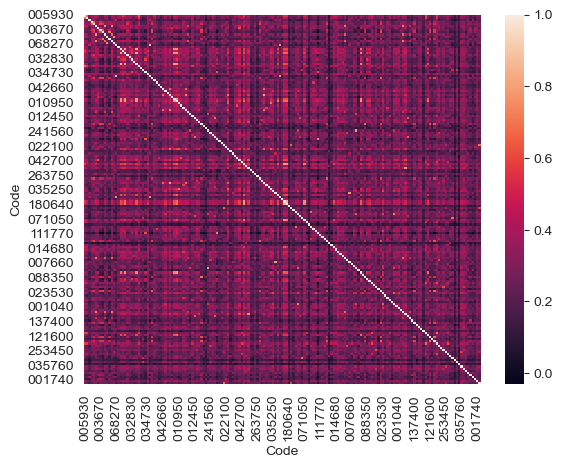

In [6]:
import seaborn as sns
sns.heatmap(ret_data.corr())

#### 2. Principal Components Analysis

sklearn의 PCA를 활용하여 차원 축소를 수행하라. `n_components = 10`으로 지정한다. clustermap을 확인해 보자. 어떤 결과가 나오는가? clustering은 잘 수행이 되었는가?

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(ret_data)

PCA(n_components=10)

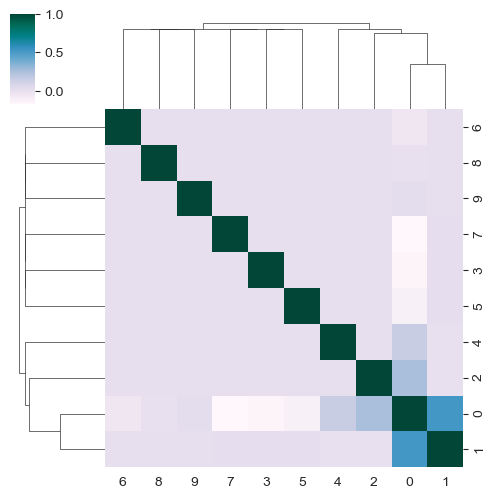

In [8]:
sns.clustermap(np.corrcoef(pca.components_), figsize = (5,5), cmap = 'PuBuGn')

#### 3. K means clustering

sklearn의 KMeans를 사용하여 군집화를 수행하라. 군집화의 개수는 10으로 지정한다. 수행한 결과를 각각 mean-variance 평면과 시간에 따른 수익률 plot에 시각화해 보자. 어떤 결과를 얻을 수 있는가?

In [9]:
from sklearn.cluster import KMeans

cov_matrix = ret_data.cov()

n_clusters = 10
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
kmeans.fit(cov_matrix)

labels = kmeans.labels_

Text(0.5, 1.0, 'Mean-variance Clustering')

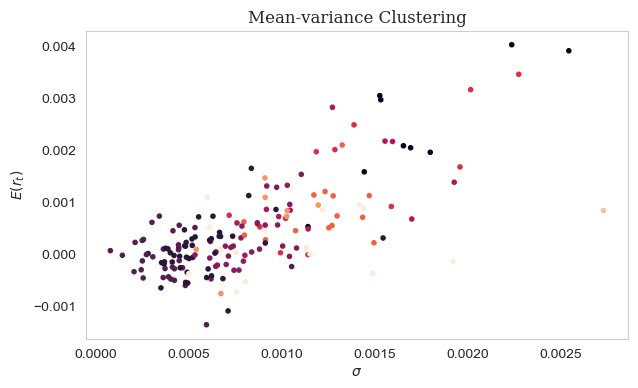

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,4))
plt.scatter(ret_data.var(axis = 0), ret_data.mean(axis = 0), c = labels, marker = '.')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$E(r_t)$')
plt.grid(False)
plt.title('Mean-variance Clustering', fontsize = 12, fontfamily = 'Serif')

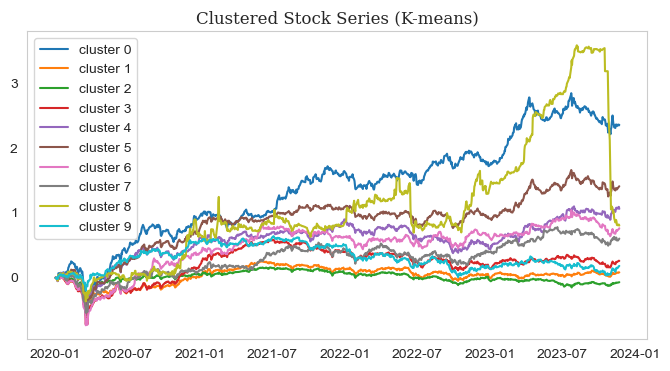

In [11]:
cluster_labels = pd.DataFrame({'cluster' : labels}, index = ret_data.columns)
plt.figure(figsize = (8, 4))
for i in range(10) :
    plt.plot(ret_data.loc[:, cluster_labels[cluster_labels['cluster'] == i].index].mean(axis = 1).cumsum(), label = 'cluster ' + str(i))
plt.grid(False)
plt.legend()
plt.title('Clustered Stock Series (K-means)', fontsize = 12, fontfamily = 'Serif')
plt.show()

#### 4. Hierarchical PCA

자산 200개에 대한 Dendogram을 출력하고 clustermap을 확인해 보자. distance는 $\sqrt{\frac{1}{2}(1 - \rho_{i,j})}$로 정의한다

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

correlation = ret_data.corr()
distances = np.sqrt((1 - correlation) / 2)
clusters = linkage(squareform(distances), method = "single")

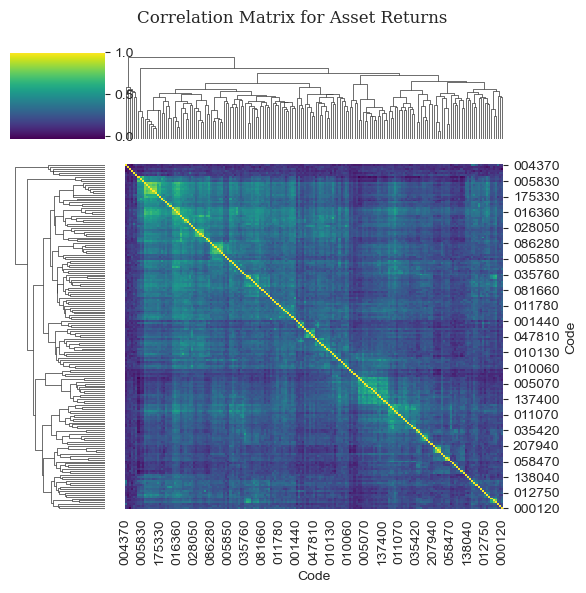

In [24]:
g = sns.clustermap(correlation, figsize = (6, 6), cmap = 'viridis')
g.fig.suptitle('Correlation Matrix for Asset Returns', fontsize=12, fontfamily='Serif')
plt.tight_layout()
plt.show()

#### 5. Quasi Diagonalization

4번의 결과에 이어 아래의 함수를 사용해 준 대각화를 시행해 보고 결과를 출력하라

In [14]:
def QuasiDiag(link: np.ndarray) -> list:
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]    # number of original items
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)    # make space
        df0 = sortIx[sortIx >= numItems]    # find clusters
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]    # item 1
        df0 = pd.Series(link[j, 1], index=i+1)
        sortIx = pd.concat([sortIx, df0])    # item 2
        sortIx = sortIx.sort_index()    # re-sort
        sortIx.index = range(sortIx.shape[0])    # re-index
    lst =  sortIx.tolist()
    return lst

In [15]:
print(QuasiDiag(clusters)) # 준 대각화된 성분의 index

[167, 100, 165, 151, 137, 75, 134, 159, 77, 65, 91, 122, 173, 54, 60, 148, 129, 2, 87, 14, 29, 66, 85, 118, 34, 171, 155, 74, 131, 93, 109, 146, 172, 53, 141, 175, 63, 174, 10, 13, 105, 88, 37, 97, 164, 26, 166, 110, 106, 149, 119, 92, 62, 176, 22, 61, 82, 96, 144, 49, 58, 115, 32, 102, 150, 114, 112, 76, 169, 130, 160, 139, 50, 79, 136, 33, 43, 68, 67, 161, 168, 15, 20, 57, 19, 147, 3, 4, 78, 108, 52, 125, 30, 132, 154, 156, 7, 8, 11, 56, 117, 158, 31, 145, 46, 116, 142, 12, 5, 9, 25, 135, 113, 44, 81, 107, 94, 101, 39, 120, 124, 140, 103, 47, 84, 55, 121, 133, 95, 138, 99, 127, 28, 126, 21, 27, 59, 104, 36, 51, 6, 69, 73, 143, 42, 83, 35, 64, 45, 38, 80, 111, 153, 86, 123, 40, 41, 18, 16, 23, 98, 71, 89, 90, 17, 70, 48, 162, 24, 0, 1, 128, 152, 157, 170, 72, 163]


#### 6. IPCA Allocation

5번의 추정된 결과와 아래의 함수를 사용하여 각 자산별 가중치를 계산하라

In [16]:
def InversePortfolio(cov, **kargs) : 
    ivp = 1 / np.diag(cov)
    ivp /= ivp.sum()
    return ivp

def ClusterVar(cov, cItems) :
    cov_ = pd.DataFrame(cov).loc[cItems, cItems] # 행렬 분할
    w_ = InversePortfolio(cov_).reshape(-1, 1)
    cVar = np.dot(np.dot(w_.T, cov_), w_)[0, 0]
    return cVar

def RecBipart(cov: np.ndarray, sortIx: list) -> pd.Series:
    w = pd.Series([1] * len(sortIx), index=sortIx)
    cItems = [sortIx]    # 모든 아이템을 하나의 군집으로 초기화
    while len(cItems) > 0:
        cItems = [i[int(j): int(k)] for i in cItems
                  for j, k in ((0, len(i) / 2), (len(i) / 2, len(i))) if len(i) > 1]    # bi-section
        for i in range(0, len(cItems), 2):    # parse in pairs
            cItems0 = cItems[i]    # cluster 1
            cItems1 = cItems[i+1]    # cluster 2
            cVar0 = ClusterVar(cov, cItems0)
            cVar1 = ClusterVar(cov, cItems1)
            alpha = 1 - cVar0 / (cVar0 + cVar1)
            w[cItems0] *= alpha    # weight 1
            w[cItems1] *= 1 - alpha    # weight 2
    return w

In [17]:
Ix = QuasiDiag(clusters)
weights = RecBipart(ret_data.cov().values, Ix)
weights.head()

167    0.003030
100    0.006791
165    0.007503
151    0.003698
137    0.016019
dtype: float64

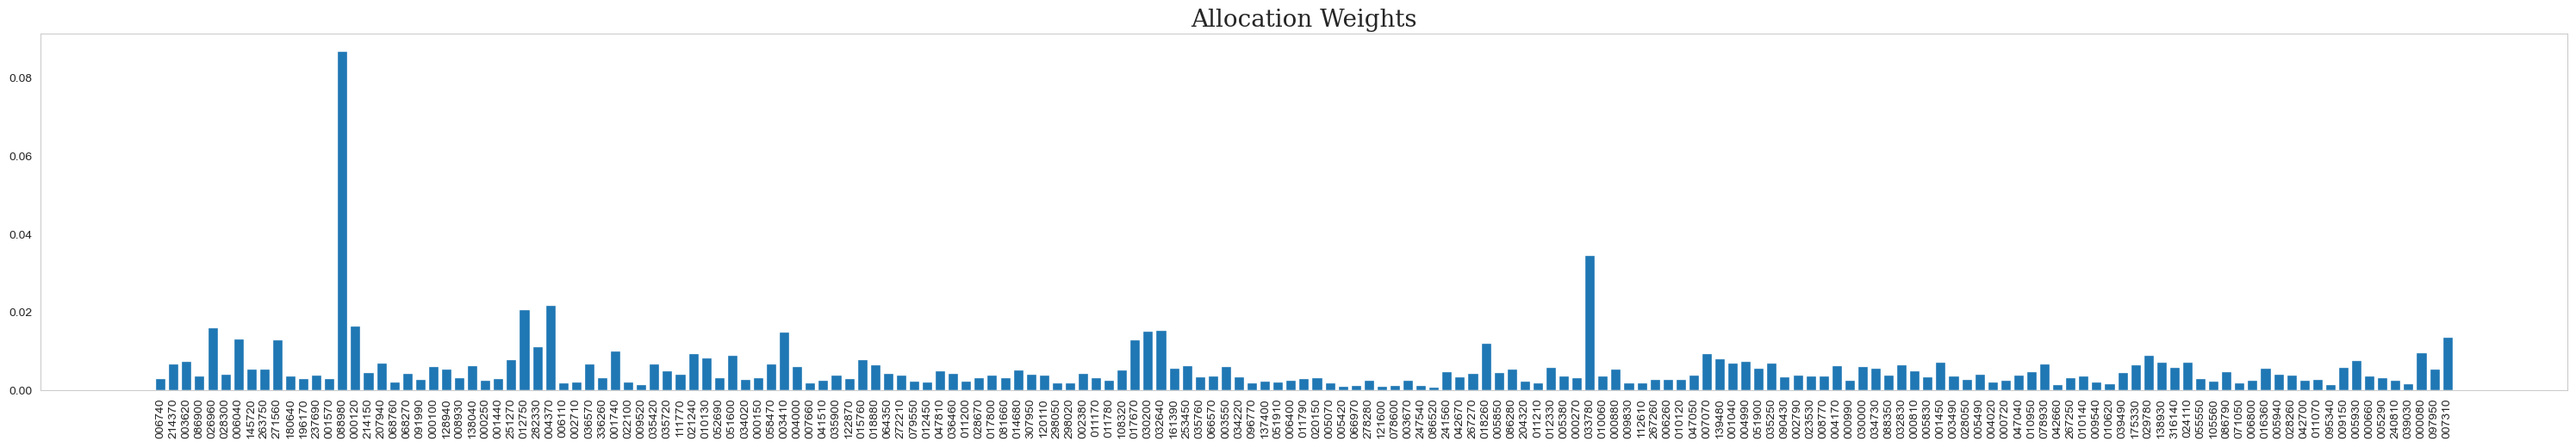

In [19]:
plt.figure(figsize = (30, 5))
plt.bar(ret_data.iloc[:,weights.index].columns, weights)
plt.grid(False)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title('Allocation Weights', fontsize = 20, fontfamily = 'Serif')
plt.show()